In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [3]:
data_path = 'desktop/Student Depression Dataset.csv' 
student_data = pd.read_csv(data_path)

In [5]:
print("Data Info:")
print(student_data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  obje

In [7]:
print("\nMissing Values:")
print(student_data.isnull().sum())


Missing Values:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:
student_data = student_data.dropna()

In [11]:
le = LabelEncoder()
for column in ['Gender', 'City', 'Degree', 'Dietary Habits', 'Sleep Duration', 
               'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']:
    student_data[column] = le.fit_transform(student_data[column])

In [13]:
features = ['Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Work/Study Hours',
            'Financial Stress', 'Family History of Mental Illness']
label = 'Depression'

X = student_data[features]
y = student_data[label]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2348
           1       0.80      0.85      0.82      3232

    accuracy                           0.79      5580
   macro avg       0.78      0.77      0.78      5580
weighted avg       0.78      0.79      0.78      5580


Confusion Matrix:
[[1642  706]
 [ 489 2743]]

ROC-AUC Score: 0.7740095320221972


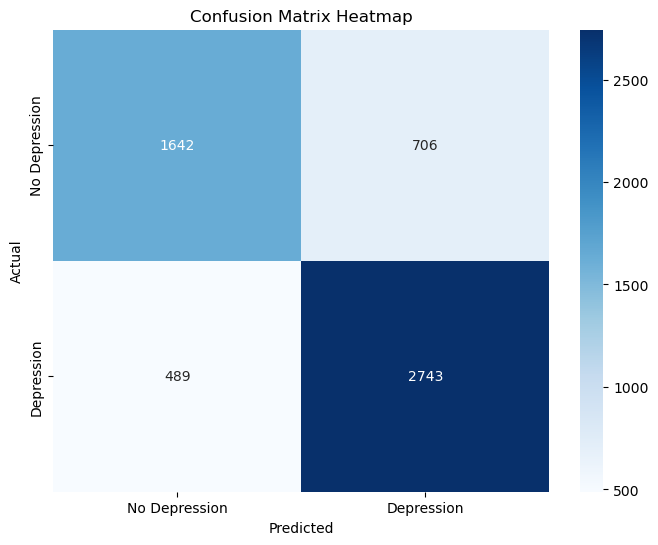

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

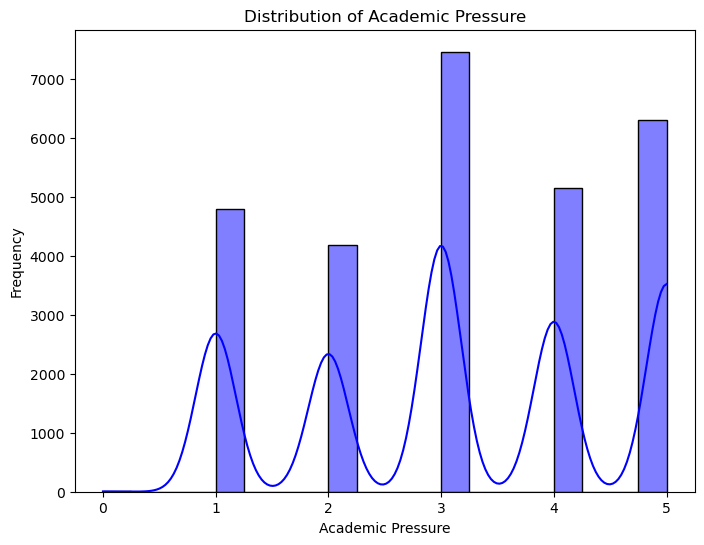

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(student_data['Academic Pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Academic Pressure')
plt.xlabel('Academic Pressure')
plt.ylabel('Frequency')
plt.show()


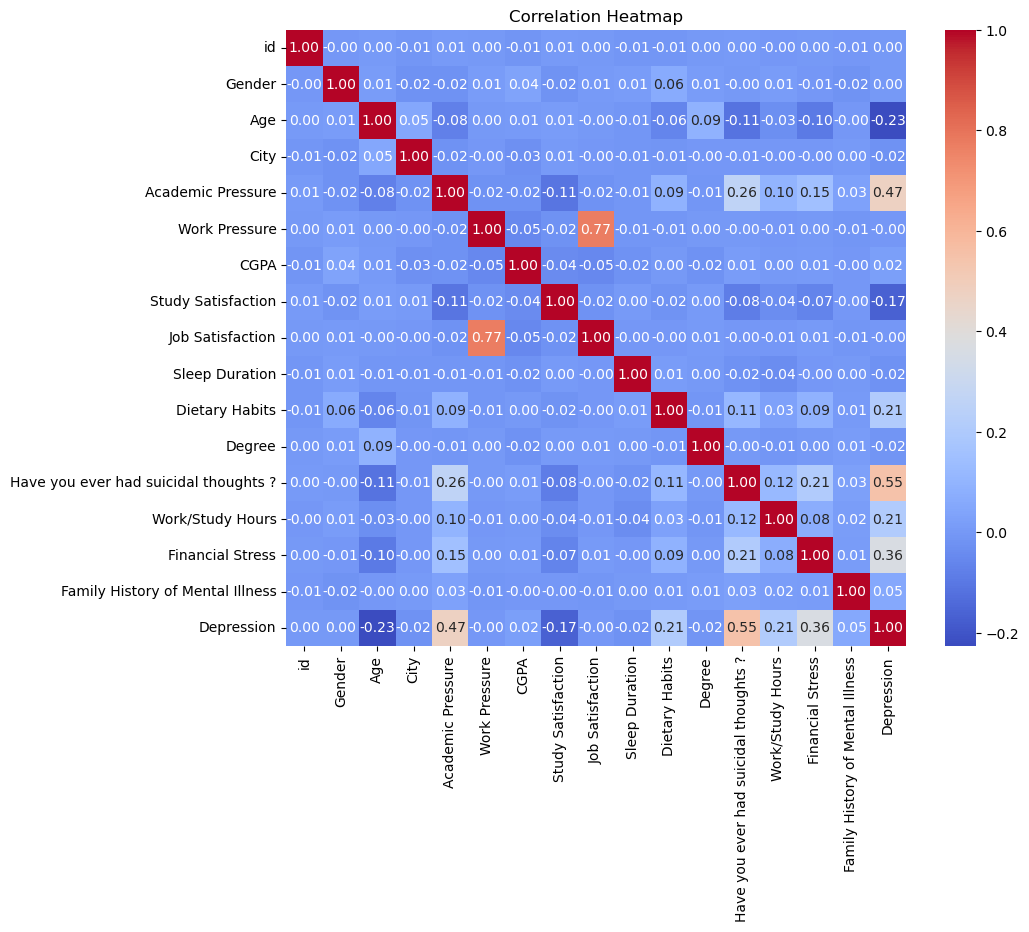

In [29]:

numeric_data = student_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


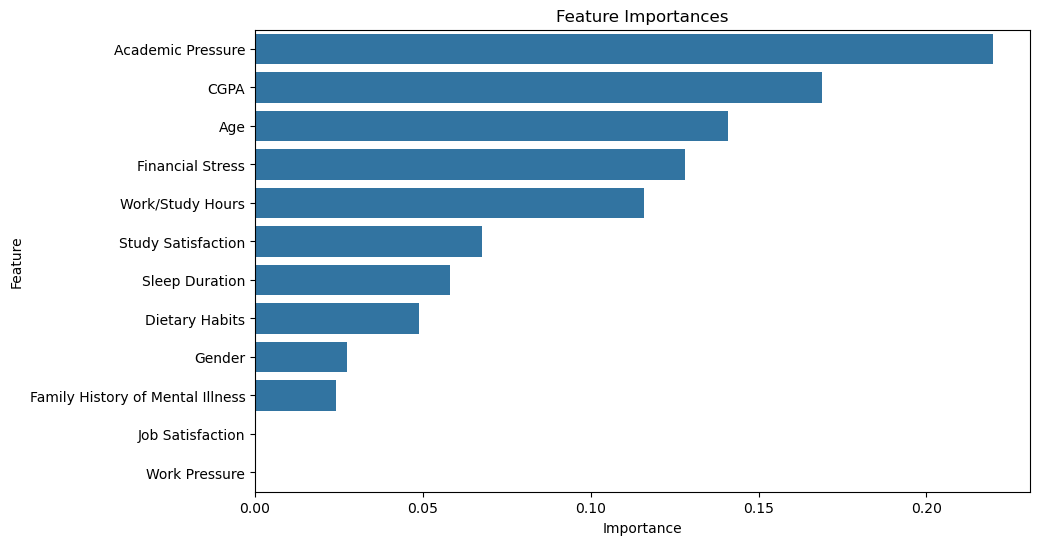

In [31]:
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [33]:
processed_data_path = 'processed_student_data.csv'
student_data.to_csv(processed_data_path, index=False)
print(f"Processed data saved to {processed_data_path}")

Processed data saved to processed_student_data.csv
